In [2]:
import numpy
import scipy.stats as stats
import matplotlib.pyplot as plots

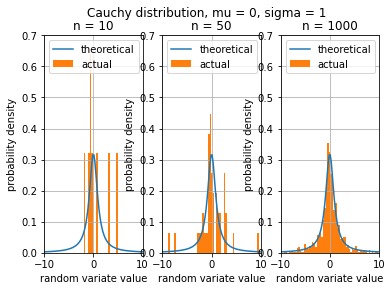

In [12]:
N = [10, 50, 1000]
length = len(N)
lborder = -10.0
rborder = 10.0
bborder = 0.0
tborder = 0.7
points = 100

mu = 0
sigma = 1
x = numpy.linspace(lborder, rborder, points)
y = stats.cauchy.pdf(x, mu, sigma)

plots.subplots(ncols=length)
plots.suptitle('Cauchy distribution, mu = ' + str(mu) + ', sigma = ' + str(sigma))

binCount = 64
binWidth = (rborder - lborder) / binCount
for i in range(length):
    plots.subplot(1, length, i + 1)
    plots.xlim(lborder, rborder)
    plots.ylim(bborder, tborder)
    plots.xlabel("random variate value")
    plots.ylabel("probability density")
    plots.title("n = " + str(N[i]))
    plots.grid()
    plots.plot(x, y)

    samples = stats.cauchy.rvs(mu, sigma, N[i])
    bins = numpy.arange(min(samples), max(samples) + binWidth, binWidth)
    plots.rcParams['figure.figsize'] = [15, 15]
    plots.hist(samples, bins, density=True)
    plots.legend(('theoretical', 'actual'), loc='upper left')
    
plots.show()

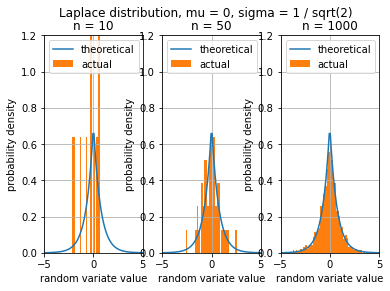

In [11]:
N = [10, 50, 1000]
length = len(N)
lborder = -5.0
rborder = 5.0
bborder = 0.0
tborder = 1.2
points = 100

mu = 0
sigma = 1.0 / numpy.sqrt(2.0)
x = numpy.linspace(lborder, rborder, points)
y = stats.laplace.pdf(x, mu, sigma)

plots.subplots(ncols=length)
plots.suptitle('Laplace distribution, mu = ' + str(mu) + ', sigma = 1 / sqrt(2)')

binCount = 64
binWidth = (rborder - lborder) / binCount
for i in range(length):
    plots.subplot(1, length, i + 1)
    plots.xlim(lborder, rborder)
    plots.ylim(bborder, tborder)
    plots.xlabel('random variate value')
    plots.ylabel('probability density')
    plots.title('n = ' + str(N[i]))
    plots.grid()
    plots.plot(x, y)

    samples = stats.laplace.rvs(mu, sigma, N[i])
    bins = numpy.arange(min(samples), max(samples) + binWidth, binWidth)
    plots.hist(samples, bins, density=True)
    plots.legend(('theoretical', 'actual'), loc='upper left')

plots.show()

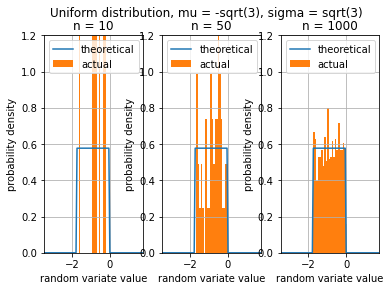

In [9]:
SQRT_3 = numpy.sqrt(3.0)

N = [10, 50, 1000]
length = len(N)
lborder = -2 * SQRT_3
rborder = SQRT_3
bborder = 0.0
tborder = 1.2
points = 100

mu = -SQRT_3
sigma = SQRT_3
x = numpy.linspace(lborder, rborder, points)
y = stats.uniform.pdf(x, mu, sigma)

plots.subplots(ncols=length)
plots.suptitle('Uniform distribution, mu = -sqrt(3), sigma = sqrt(3)')

binCount = 64
binWidth = (rborder - lborder) / binCount
for i in range(length):
    plots.subplot(1, length, i + 1)
    plots.xlim(lborder, rborder)
    plots.ylim(bborder, tborder)
    plots.xlabel("random variate value")
    plots.ylabel("probability density")
    plots.title("n = " + str(N[i]))
    plots.grid()
    plots.plot(x, y)

    samples = stats.uniform.rvs(mu, sigma, N[i])
    bins = numpy.arange(min(samples), max(samples) + binWidth, binWidth)
    plots.hist(samples, bins, density=True)
    plots.legend(('theoretical', 'actual'), loc='upper left')

plots.show()

In [ ]:
import math
from scipy.special import factorial
import numpy as np  # стандартный алиас для numpy
import matplotlib.pyplot as plt  # стандартный алиас для pyplot

In [ ]:
distributions = {
     'Normal': lambda num: np.random.normal(0, 1, num),
     'Cauchy': lambda num: np.random.standard_cauchy(num),
     'Laplace': lambda num: np.random.laplace(0, math.sqrt(2) / 2, num),
     'Poisson': lambda num: np.random.poisson(10, num),
     'Uniform': lambda num: np.random.uniform(-math.sqrt(3), math.sqrt(3), num)
}


pdfs = {
     'Normal': lambda x: (1 / (np.sqrt(2 * np.pi)) * np.exp(-x ** 2 / (2 ** 2))),
     'Cauchy': lambda x: 1 / (np.pi * (x * x + 1)),
     'Laplace': lambda x: np.exp(-abs(x) / (1. / np.sqrt(2))) / (2. * (1. / np.sqrt(2))),
     'Poisson': lambda x: np.exp(-10)*np.power(10, x)/factorial(x),
     'Uniform': lambda x: [(1 / (2 * np.sqrt(3)) if np.fabs(x_k) <= np.sqrt(3) else 0) for x_k in x]
}


def get_distribution(distr_name, num):
    return distributions.get(distr_name)(num)


def get_pdf(distr_name, x):
    return pdfs.get(distr_name)(x)


for disrt_name in distributions.keys():
    # Здесь все как обычно
    fig = plt.figure(figsize=(16, 20))
    fig.suptitle(disrt_name)

    nrows = 1
    ncols = 3

    sizes = [10, 50, 1000]

    for a in range(1, nrows + 1):
        for b in range(1, ncols + 1):
            # Выбираем ячейку
            ax = fig.add_subplot(nrows, ncols, (a - 1) * ncols + b)
            # Строим гистограмму
            s = get_distribution(disrt_name, sizes[b-1])
            ax.hist(s, normed=True, facecolor='grey', edgecolor='black')
            # Строим график плотности
            x = np.arange(-8., 8., .01)
            pdf = get_pdf(disrt_name, x)
            ax.plot(x, pdf)

            # Делаем подписи
            ax.set_title(disrt_name + 'Distribution, n = ' + str(sizes[b-1]))

    plt.show()